In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
## EDA


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Null value check

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

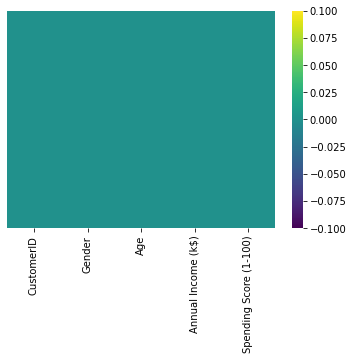

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


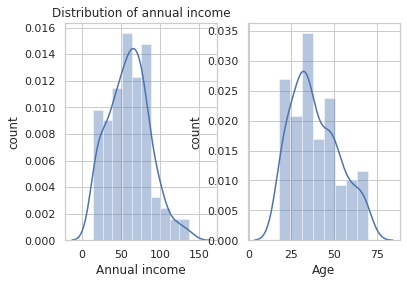

In [ ]:
plt.subplot(1,2,1)
sns.set(style="whitegrid")
sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of annual income")
plt.xlabel("Annual income")
plt.ylabel("count")

plt.subplot(1,2,2)
sns.set(style="whitegrid")
sns.distplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

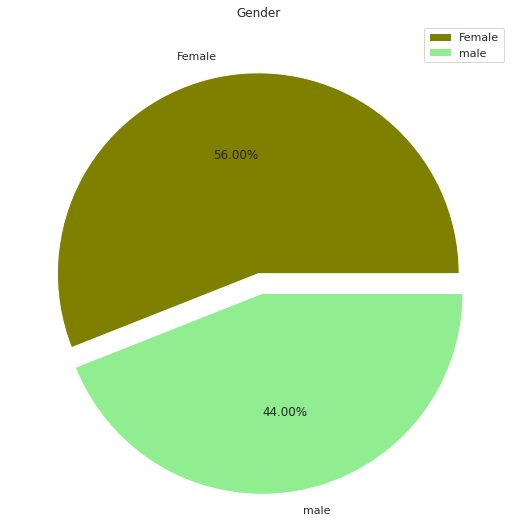

In [ ]:
labels=["Female","male"]
size=df["Gender"].value_counts()
colors=["olive","lightgreen"]
explode=[0,0.1]
plt.figure(figsize=(9,10))
plt.pie(x=size,colors=colors,labels=labels,explode=explode,autopct="%0.2f%%")
plt.title("Gender")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


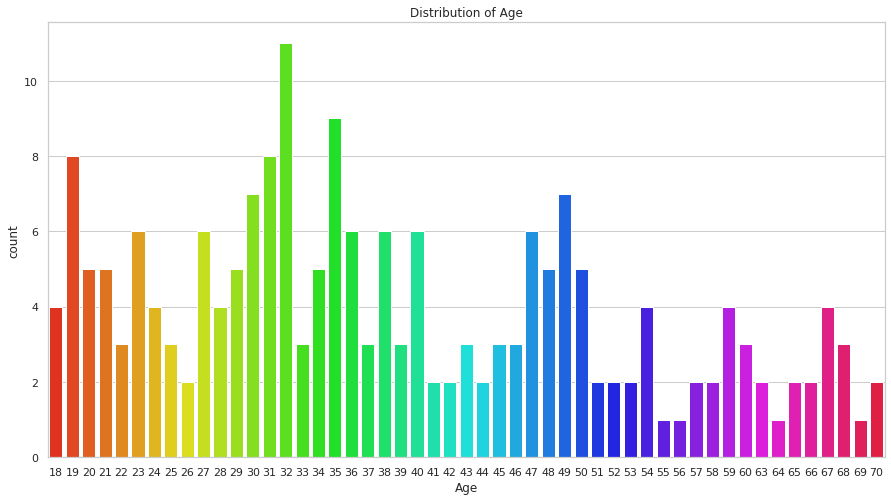

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df["Age"],palette="hsv")
plt.title("Distribution of Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


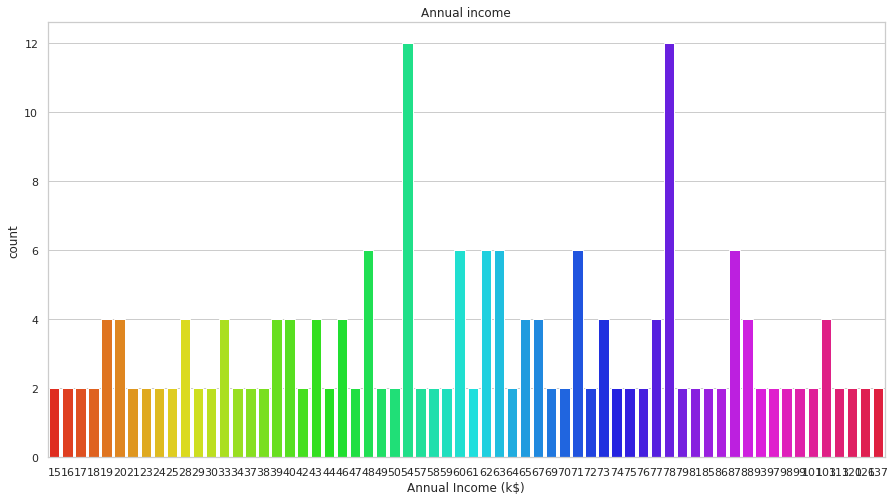

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df["Annual Income (k$)"],palette="hsv")
plt.title("Annual income")
plt.show()

## Clustering 

In [ ]:
X=df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

K Means

Elbow Method

In [ ]:
from sklearn.cluster import KMeans

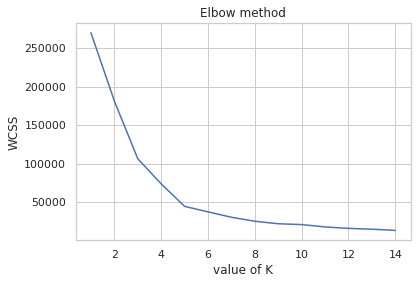

In [ ]:
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title("Elbow method")
plt.xlabel("value of K")
plt.ylabel("WCSS")
plt.show()


Kmeans Visualization

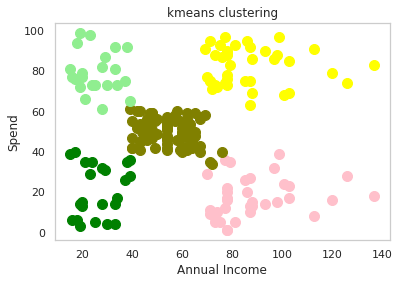

In [40]:
km=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
ymean=km.fit_predict(X)
plt.scatter(X[ymean==0,0],X[ymean==0,1],s=100,
            c="pink",label="miser")
plt.scatter(X[ymean==1,0],X[ymean==1,1],s=100,
            c="olive",label="general")
plt.scatter(X[ymean==2,0],X[ymean==2,1],s=100,
            c="yellow",label="target")
plt.scatter(X[ymean==3,0],X[ymean==3,1],s=100,
            c="lightgreen",label="spendmachine")
plt.scatter(X[ymean==4,0],X[ymean==4,1],s=100,
            c="green",label="careful")
plt.title("kmeans clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spend")
# plt.legend()
plt.grid()
plt.show()